### Installation
* Most of the libraries required for visualization like [skimage](https://scikit-image.org/docs/dev/api/skimage.html) and [matplotlib](https://matplotlib.org/) come preinstalled in kaggle environment.
* One library required to visualize COCO dataset is [Pycocotools]() which can be installed using the following command.
`pip install 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI`

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os 

In [ ]:
PATH = os.getcwd()

In [ ]:
%cd '/content/drive/MyDrive/detectron'



/content/drive/MyDrive/detectron


In [ ]:
!python -m pip install git+https://github.com/facebookresearch/detectron2.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-b5vkcrzs
  Running command git clone -q https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-b5vkcrzs
     |████████████████████████████████| 50 kB 3.2 MB/s 
     |████████████████████████████████| 79 kB 6.4 MB/s 
     |████████████████████████████████| 151 kB 44.1 MB/s 
     |████████████████████████████████| 1.4 MB 63.9 MB/s 
     |████████████████████████████████| 509 kB 63.5 MB/s 
     |████████████████████████████████| 248 kB 69.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 96 kB 7.5 MB/s 
     |████████████████████████████████| 843 kB 54.0 MB/s 
     |████████████████████████████████| 596 kB 62.7 MB/s 
     |████████

### <h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black; border:0' role="tab" aria-controls="home"><center>Import Libraries</center></h3>

In [ ]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import random
pylab.rcParams['figure.figsize'] = (8.0, 10.0)# Import Libraries

# For visualization
import os
import seaborn as sns
from matplotlib import colors
from tensorboard.backend.event_processing import event_accumulator as ea
from PIL import Image

<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black; border:0' role="tab" aria-controls="home"><center>Set constant variables</center></h3>

In [ ]:
# I am visualizing some images in the 'val/' directory

dataDir='/content/drive/MyDrive/detectron/coco-dataset/val'
dataType='COCO_val_annos'

mul_dataType='COCO_mul_val_annos'

annFile='{}/{}.json'.format(dataDir,dataType)

mul_annFile='{}/{}.json'.format(dataDir,mul_dataType)

img_dir = "/content/drive/MyDrive/detectron/coco-dataset/img"

<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black; border:0' role="tab" aria-controls="home"><center> Initialize the COCO API</center></h3>

In [ ]:
print(annFile)

print('\n\n')

print(mul_annFile)

/content/drive/MyDrive/detectron/coco-dataset/val/COCO_val_annos.json



/content/drive/MyDrive/detectron/coco-dataset/val/COCO_mul_val_annos.json


In [ ]:
# initialize coco api for instance annotations
coco=COCO(annFile)

print('\n\n')

mul_coco=COCO(mul_annFile)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!



loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [ ]:
print(coco.cats)

{1: {'id': 1, 'name': 'damage', 'supercategory': 'part'}}


<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black; border:0' role="tab" aria-controls="home"><center> Display damage categories and supercategories</center></h3>

In [ ]:
# display categories and supercategories

#Single Class #Damage dataset
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories for damages: \n{}\n'.format(', '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories for damages: \n{}\n'.format(', '.join(nms)))

#Multi Class #Parts dataset

mul_cats = mul_coco.loadCats(mul_coco.getCatIds())
mul_nms=[cat['name'] for cat in mul_cats]
print('COCO categories for parts: \n{}\n'.format(', '.join(mul_nms)))

mul_nms = set([mul_cat['supercategory'] for mul_cat in mul_cats])
print('COCO supercategories for parts: \n{}\n'.format(', '.join(mul_nms)))



COCO categories for damages: 
damage

COCO supercategories for damages: 
part

COCO categories for parts: 
headlamp, rear_bumper, door, hood, front_bumper

COCO supercategories for parts: 
part



In [ ]:
# get all images containing 'damage' category, select one at random
catIds = coco.getCatIds(catNms=['damage']);

#considering the category id to be 0 explicitly
imgIds = coco.getImgIds(catIds=catIds );


In [ ]:
print(coco.getImgIds(catIds))
print(imgIds)

[1]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [ ]:
random_img_id = random.choice(imgIds)
print("{} image id was selected at random from the {} list".format(random_img_id, imgIds))

8 image id was selected at random from the [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] list


In [ ]:
# Load the image
imgId = coco.getImgIds(imgIds = [random_img_id])
img = coco.loadImgs(imgId)[0]
print("Image details \n",img)

Image details 
 {'coco_url': '', 'date_captured': '2020-07-14 09:59:34.190485', 'file_name': '78.jpg', 'flickr_url': '', 'height': 1024, 'id': 8, 'license': 1, 'width': 1024}


<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black; border:0' role="tab" aria-controls="home"><center> Raw Image</center></h3>

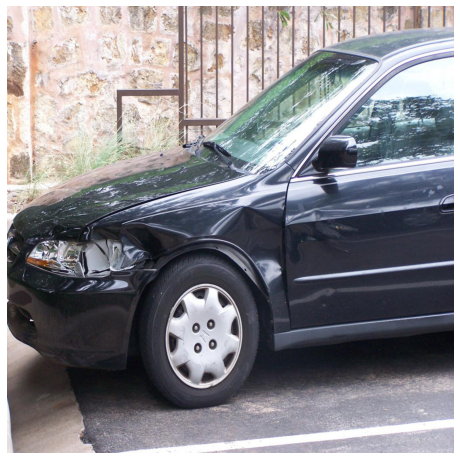

In [ ]:
I = io.imread(img_dir + '/' + img['file_name'])
plt.axis('off')
plt.imshow(I)
plt.show()

<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black; border:0' role="tab" aria-controls="home"><center> Image with damage annotation</center></h3>

In [ ]:
#get damage annotations
annIds = coco.getAnnIds(imgIds=imgId,iscrowd=None)
anns = coco.loadAnns(annIds)


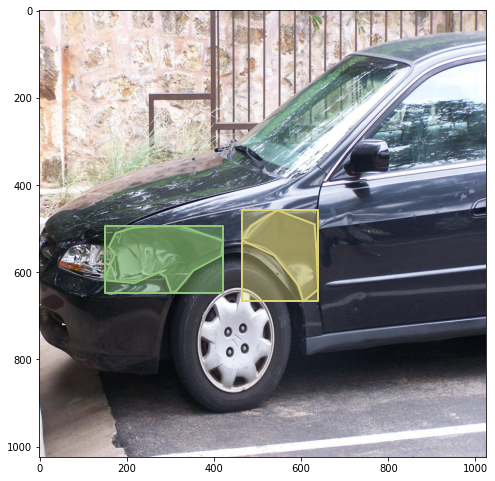

In [ ]:
#Plot damages
plt.imshow(I)
plt.axis('on')
coco.showAnns(anns, draw_bbox=True )

<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black; border:0' role="tab" aria-controls="home"><center> Image with parts annotation</center></h3>

In [ ]:
#get parts annotations
mul_annIds = mul_coco.getAnnIds(imgIds=imgId,iscrowd=None)
mul_anns = mul_coco.loadAnns(mul_annIds)

In [ ]:
# Create a dictionary between category_id and category name
category_map = dict()

for ele in list(mul_coco.cats.values()):
    category_map.update({ele['id']:ele['name']})

In [ ]:
category_map

{1: 'headlamp', 2: 'rear_bumper', 3: 'door', 4: 'hood', 5: 'front_bumper'}

Parts are: ['hood', 'door', 'front_bumper', 'headlamp']


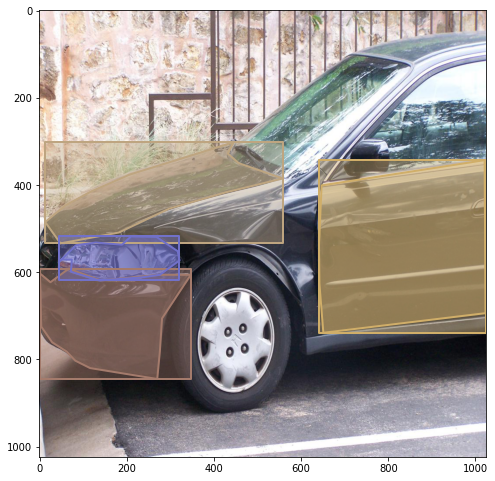

In [ ]:
#Create a list of parts in the image
parts = []
for region in mul_anns:
    parts.append(category_map[region['category_id']])

print("Parts are:", parts) 

#Plot Parts
I = io.imread(img_dir + '/' + img['file_name'])
plt.imshow(I)
plt.axis('on')
mul_coco.showAnns(mul_anns, draw_bbox=True )

<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black;' role="tab" aria-controls="home"><center> Training Object detection model using Detectron 2</center></h2>

<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black;' role="tab" aria-controls="home"><center> Installation </center></h3>

In [ ]:
# Install detectron 2
!python -m pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu102/torch1.7/index.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu102/torch1.7/index.html


<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black;' role="tab" aria-controls="home"><center> Import Libraries required for training</center></h3>

In [ ]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

1.12.0+cu113 True


In [ ]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
import matplotlib.pyplot as plt
import skimage.io as io

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.engine import DefaultTrainer
from detectron2.utils.visualizer import ColorMode
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

# Set base params
plt.rcParams["figure.figsize"] = [16,9]

In [ ]:
# To find out inconsistent CUDA versions, if there is not "failed" word in this output then things are fine.
!python -m detectron2.utils.collect_env

----------------------  ----------------------------------------------------------------
sys.platform            linux
Python                  3.7.13 (default, Apr 24 2022, 01:04:09) [GCC 7.5.0]
numpy                   1.21.6
detectron2              0.6 @/usr/local/lib/python3.7/dist-packages/detectron2
Compiler                GCC 7.5
CUDA compiler           CUDA 11.1
detectron2 arch flags   7.5
DETECTRON2_ENV_MODULE   <not set>
PyTorch                 1.12.0+cu113 @/usr/local/lib/python3.7/dist-packages/torch
PyTorch debug build     False
GPU available           Yes
GPU 0                   Tesla T4 (arch=7.5)
Driver version          460.32.03
CUDA_HOME               /usr/local/cuda
Pillow                  7.1.2
torchvision             0.13.0+cu113 @/usr/local/lib/python3.7/dist-packages/torchvision
torchvision arch flags  3.5, 5.0, 6.0, 7.0, 7.5, 8.0, 8.6
fvcore                  0.1.5.post20220512
iopath                  0.1.9
cv2                     4.6.0
----------------------  ----

<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black;' role="tab" aria-controls="home"><center>  Register Car Damage Dataset </center></h3>

In [ ]:
dataset_dir = "/content/drive/MyDrive/detectron/coco-dataset/"
img_dir = "img/"
train_dir = "train/"
val_dir = "val/"

If you want to use a custom dataset while also reusing detectron2’s data loaders, you will need to

*  Register your dataset (i.e., tell detectron2 how to obtain your dataset).

* Optionally, register metadata for your dataset.

In [ ]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("car_dataset_train", {}, os.path.join(dataset_dir,train_dir,"COCO_train_annos.json"), os.path.join(dataset_dir,img_dir))
register_coco_instances("car_dataset_val", {}, os.path.join(dataset_dir,val_dir,"COCO_val_annos.json"), os.path.join(dataset_dir,img_dir))

In [ ]:
dataset_dicts = DatasetCatalog.get("car_dataset_train")
metadata_dicts = MetadataCatalog.get("car_dataset_train")

[08/10 12:47:14 d2.data.datasets.coco]: Loaded 59 images in COCO format from /content/drive/MyDrive/detectron/coco-dataset/train/COCO_train_annos.json


<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black;' role="tab" aria-controls="home"><center> Model Train </center></h2>

###Implementing my own Trainer Module here to use the COCO validation evaluation during training
#### TODO: add data custom augmentation 
class CocoTrainer(DefaultTrainer):

  @classmethod
  def build_evaluator(cls, cfg, dataset_name, output_folder=None):

    if output_folder is None:
        os.makedirs("coco_eval", exist_ok=True)
        output_folder = "coco_eval"

    return COCOEvaluator(dataset_name, cfg, False, output_folder)

In [ ]:
TS = os.path.join("/content/drive/MyDrive/","/coco-damage-detection-trained-models/damage_segmentation_model/damage_segmentation_model.pth")
print(TS)

/coco-damage-detection-trained-models/damage_segmentation_model/damage_segmentation_model.pth


In [ ]:
#get configuration
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2  # only has one class (damage) + 1
cfg.MODEL.RETINANET.NUM_CLASSES = 2 # only has one class (damage) + 1
cfg.MODEL.WEIGHTS = os.path.join("/content/drive/MyDrive/coco-damage-detection-trained-models/damage_segmentation_model/damage_segmentation_model.pth")
#cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7 
cfg['MODEL']['DEVICE']='cuda'#or cpu
damage_predictor = DefaultPredictor(cfg)





[08/10 12:47:24 d2.checkpoint.c2_model_loading]: Following weights matched with model:
| Names in Model                                  | Names in Checkpoint                                                                                  | Shapes                                          |
|:------------------------------------------------|:-----------------------------------------------------------------------------------------------------|:------------------------------------------------|
| backbone.bottom_up.res2.0.conv1.*               | backbone.bottom_up.res2.0.conv1.{norm.bias,norm.running_mean,norm.running_var,norm.weight,weight}    | (64,) (64,) (64,) (64,) (64,64,1,1)             |
| backbone.bottom_up.res2.0.conv2.*               | backbone.bottom_up.res2.0.conv2.{norm.bias,norm.running_mean,norm.running_var,norm.weight,weight}    | (64,) (64,) (64,) (64,) (64,64,3,3)             |
| backbone.bottom_up.res2.0.conv3.*               | backbone.bottom_up.res2.0.conv3.{norm.bia

The checkpoint state_dict contains keys that are not used by the model:
  pixel_mean
  pixel_std


In [ ]:
cfg_mul = get_cfg()
cfg_mul.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg_mul.MODEL.ROI_HEADS.NUM_CLASSES = 6  # only has five classes (headlamp,hood,rear_bumper,front_bumper_door) + 1
cfg_mul.MODEL.RETINANET.NUM_CLASSES = 6 # only has five classes (headlamp,hood,rear_bumper,front_bumper_door) + 1
cfg_mul.MODEL.WEIGHTS = os.path.join("/content/drive/MyDrive/coco-damage-detection-trained-models/part_segmentation_model/part_segmentation_model.pth")
#cfg_mul.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg_mul.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7 
cfg_mul['MODEL']['DEVICE']='cuda' #or cpu
part_predictor = DefaultPredictor(cfg_mul)

[08/10 12:47:30 d2.checkpoint.c2_model_loading]: Following weights matched with model:
| Names in Model                                  | Names in Checkpoint                                                                                  | Shapes                                          |
|:------------------------------------------------|:-----------------------------------------------------------------------------------------------------|:------------------------------------------------|
| backbone.bottom_up.res2.0.conv1.*               | backbone.bottom_up.res2.0.conv1.{norm.bias,norm.running_mean,norm.running_var,norm.weight,weight}    | (64,) (64,) (64,) (64,) (64,64,1,1)             |
| backbone.bottom_up.res2.0.conv2.*               | backbone.bottom_up.res2.0.conv2.{norm.bias,norm.running_mean,norm.running_var,norm.weight,weight}    | (64,) (64,) (64,) (64,) (64,64,3,3)             |
| backbone.bottom_up.res2.0.conv3.*               | backbone.bottom_up.res2.0.conv3.{norm.bia

The checkpoint state_dict contains keys that are not used by the model:
  pixel_mean
  pixel_std


In [ ]:
# Scipy for calculating distance
from scipy.spatial import distance

In [ ]:
def detect_damage_part(damage_dict, parts_dict):
  """
  Returns the most plausible damaged part for the list of damages by checking the distance 
  between centers centers of damage_polygons and parts_polygons

  Parameters
  -------------
   damage_dict: dict
                Dictionary that maps damages to damage polygon centers.
   parts_dict: dict
                Dictionary that maps part labels to parts polygon centers.
  Return
  ----------
  part_name: str
            The most plausible damaged part name.
  """
  try:
    max_distance = 10e9
    assert len(damage_dict)>0, "AssertError: damage_dict should have atleast one damage"
    assert len(parts_dict)>0, "AssertError: parts_dict should have atleast one part"
    max_distance_dict = dict(zip(damage_dict.keys(),[max_distance]*len(damage_dict)))
    part_name = dict(zip(damage_dict.keys(),['']*len(damage_dict)))

    for y in parts_dict.keys():
        for x in damage_dict.keys():
          dis = distance.euclidean(damage_dict[x], parts_dict[y])
          if dis < max_distance_dict[x]:
            part_name[x] = y.rsplit('_',1)[0]

    return list(set(part_name.values()))
  except Exception as e:
    print(e)

In [ ]:
damage_class_map= {0:'damage'}
parts_class_map={0:'headlamp',1:'rear_bumper', 2:'door', 3:'hood', 4: 'front_bumper'}

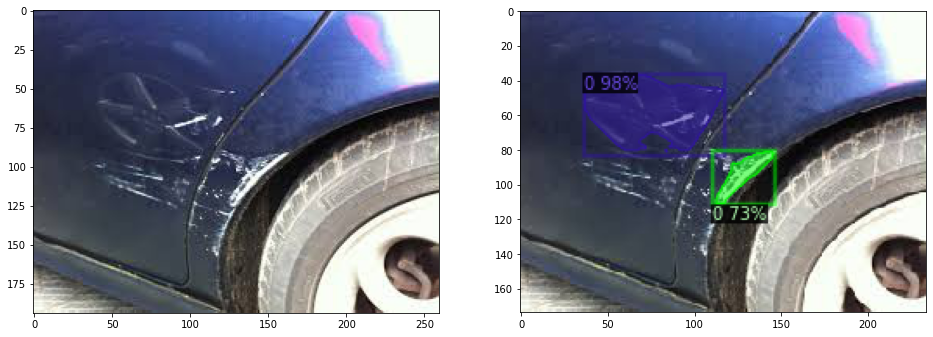

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize =(16,12))
#im = io.imread("https://di-uploads-pod6.dealerinspire.com/carhopredesign/uploads/2018/05/Car-scratches-silver-bumper_45002223.jpg")
#im = io.imread('/content/drive/MyDrive/coco-damage-detection-trained-models/car_example.JPEG.jpeg')
im = io.imread('/content/drive/MyDrive/coco-damage-detection-trained-models' + '/' + '0157.JPEG')
#im = Image.open('/content/drive/MyDrive/coco-damage-detection-trained-models' + '/' + 'car_back.png').convert('RGB')



#damage inference
damage_outputs = damage_predictor(im)
damage_v = Visualizer(im[:, :, ::-1],
                   metadata=MetadataCatalog.get("car_dataset_val"), 
                   scale=0.9, 
                   #instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
)
damage_out = damage_v.draw_instance_predictions(damage_outputs["instances"].to("cpu"))

#part inference
parts_outputs = part_predictor(im)
parts_v = Visualizer(im[:, :, ::-1],
                   metadata=MetadataCatalog.get("car_mul_dataset_val"), 
                   scale=0.9, 
                   #instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
)
parts_out = parts_v.draw_instance_predictions(parts_outputs["instances"].to("cpu"))


#plot
ax1.imshow(im)
ax2.imshow(damage_out.get_image()[:, :, ::-1],)

#ax3.imshow(parts_out.get_image()[:, :, ::-1])


In [ ]:
damage_prediction_classes = [ damage_class_map[el] + "_" + str(indx) for indx,el in enumerate(damage_outputs["instances"].pred_classes.tolist())]
damage_polygon_centers = damage_outputs["instances"].pred_boxes.get_centers().tolist()
damage_dict = dict(zip(damage_prediction_classes,damage_polygon_centers))

In [ ]:

parts_prediction_classes = [ parts_class_map[el] + "_" + str(indx) for indx,el in enumerate(parts_outputs["instances"].pred_classes.tolist())]
parts_polygon_centers =  parts_outputs["instances"].pred_boxes.get_centers().tolist()



#Remove centers which lie in beyond 800 units
parts_polygon_centers_filtered = list(filter(lambda x: x[0] < 800 and x[1] < 800, parts_polygon_centers))
parts_dict = dict(zip(parts_prediction_classes,parts_polygon_centers_filtered))

In [ ]:
print("Damaged Parts: ",detect_damage_part(damage_dict,parts_dict))

AssertError: damage_dict should have atleast one damage
Damaged Parts:  None


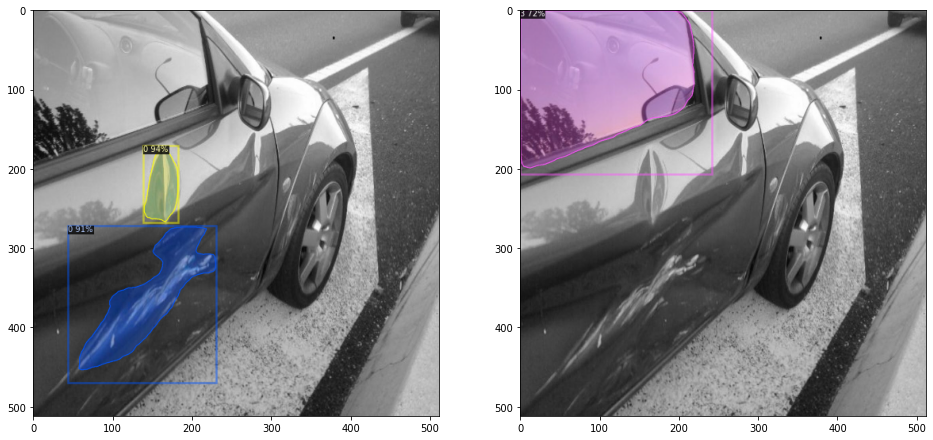

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize =(16,12))
im = io.imread('/content/drive/MyDrive/detectron/coco-dataset/img' + '/' +'9.jpg')
#damage inference
damage_outputs = damage_predictor(im)
damage_v = Visualizer(im[:, :, ::-1],
                   metadata=MetadataCatalog.get("car_dataset_val"), 
                   scale=0.5, 
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
)
damage_out = damage_v.draw_instance_predictions(damage_outputs["instances"].to("cpu"))

#part inference
parts_outputs = part_predictor(im)
parts_v = Visualizer(im[:, :, ::-1],
                   metadata=MetadataCatalog.get("car_mul_dataset_val"), 
                   scale=0.5, 
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
)
parts_out = parts_v.draw_instance_predictions(parts_outputs["instances"].to("cpu"))

#plot
ax1.imshow(damage_out.get_image()[:, :, ::-1],)
ax2.imshow(parts_out.get_image()[:, :, ::-1])